# Customer Churn Analysis 

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. You can download the dataset from

https://github.com/dsrscientist/DSData /Telecom customer churn .csv

https://www.kaggle.com/becksddf/churn-in-telecoms-dataset#bigml_59c28831336c6604c800002a.csv

In [1]:
#import libary for use method
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
Customer= pd.read_csv('Telecom_customer_churn.csv')
Customer.head(25)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
Customer.shape

(7043, 21)

In [4]:
Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
Customer.columns.to_series().groupby(Customer.dtypes).groups

{dtype('int64'): Index(['SeniorCitizen', 'tenure'], dtype='object'),
 dtype('float64'): Index(['MonthlyCharges'], dtype='object'),
 dtype('O'): Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
        'Churn'],
       dtype='object')}

In [6]:
#check out null values
empty_cols=['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
for i in empty_cols:
    Customer[i]=Customer[i].replace(" ",np.nan)
print(Customer.isna().values.any())
Customer.isna().sum()

True


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
Customer=Customer.dropna()


In [8]:
Customer.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
Customer.shape

(7032, 21)

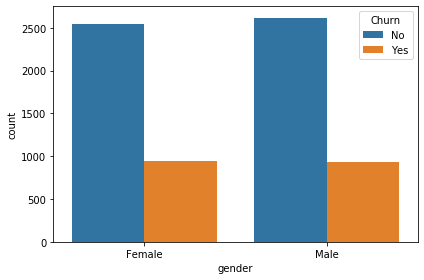

In [10]:
sns.countplot('gender', hue='Churn', data=Customer)
plt.tight_layout()
plt.show()

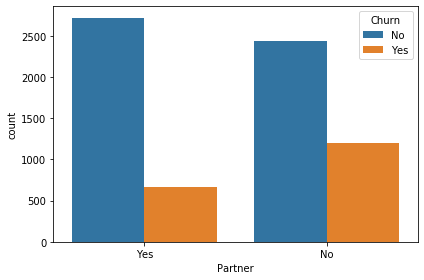

In [11]:
sns.countplot('Partner', hue='Churn', data=Customer)
plt.tight_layout()
plt.show()

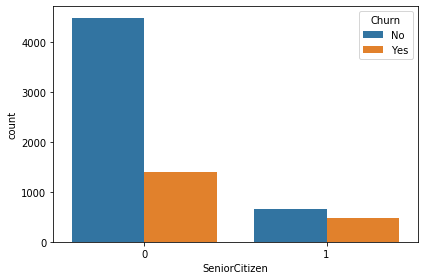

In [12]:
sns.countplot('SeniorCitizen', hue='Churn', data=Customer)
plt.tight_layout()
plt.show()

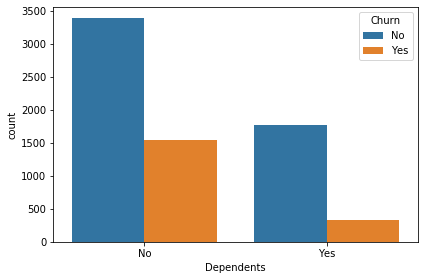

In [13]:
sns.countplot('Dependents', hue='Churn', data=Customer)
plt.tight_layout()
plt.show()

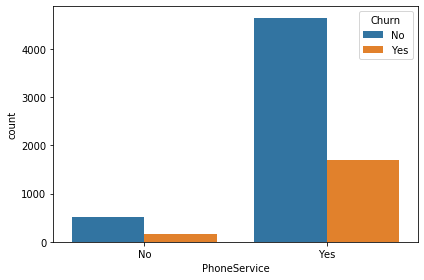

In [14]:
sns.countplot('PhoneService', hue='Churn', data=Customer)
plt.tight_layout()
plt.show()

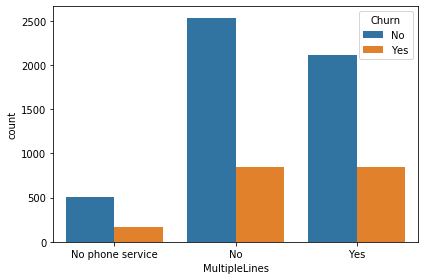

In [15]:
sns.countplot('MultipleLines', hue='Churn', data=Customer)
plt.tight_layout()
plt.show()

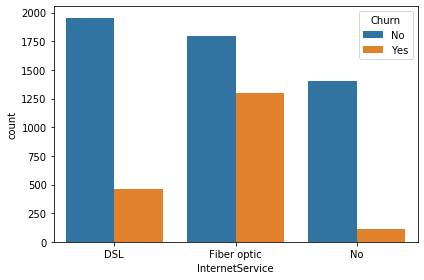

In [16]:
sns.countplot('InternetService', hue='Churn', data=Customer)
plt.tight_layout()
plt.show()

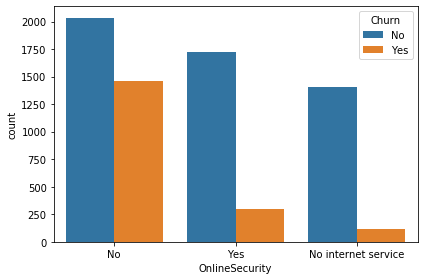

In [17]:
sns.countplot('OnlineSecurity', hue='Churn', data=Customer)
plt.tight_layout()
plt.show()

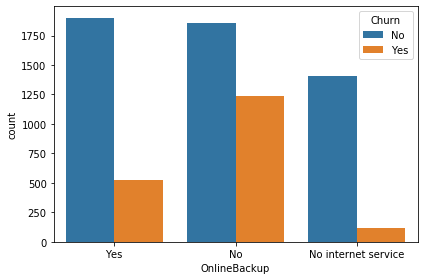

In [18]:
sns.countplot('OnlineBackup', hue='Churn', data=Customer)
plt.tight_layout()
plt.show()

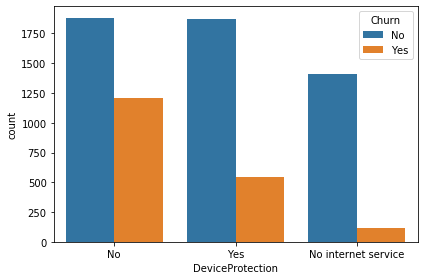

In [19]:
sns.countplot('DeviceProtection', hue='Churn', data=Customer)
plt.tight_layout()
plt.show()

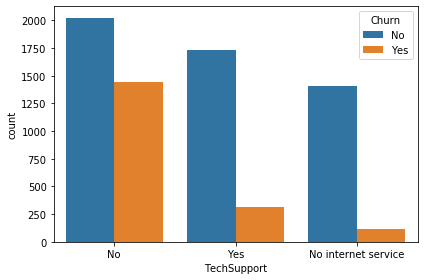

In [20]:
sns.countplot('TechSupport', hue='Churn', data=Customer)
plt.tight_layout()
plt.show()

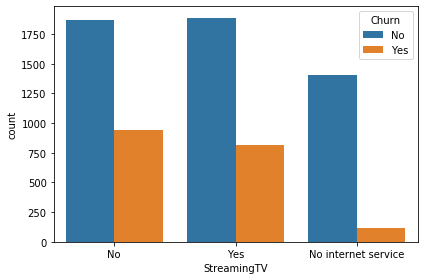

In [21]:
sns.countplot('StreamingTV', hue='Churn', data=Customer)
plt.tight_layout()
plt.show()

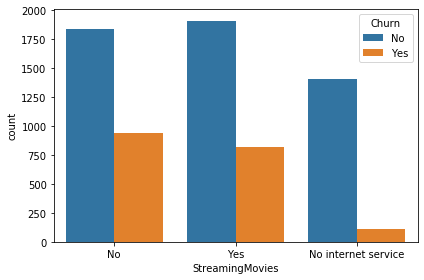

In [22]:
sns.countplot('StreamingMovies', hue='Churn', data=Customer)
plt.tight_layout()
plt.show()

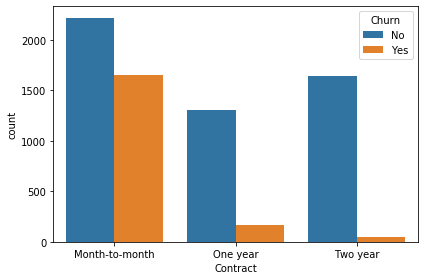

In [23]:
sns.countplot('Contract', hue='Churn', data=Customer)
plt.tight_layout()
plt.show()

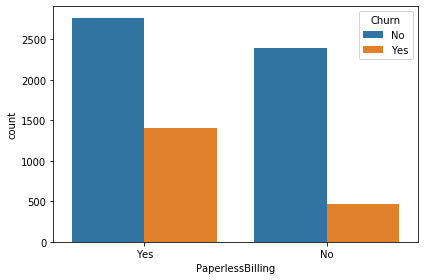

In [24]:
sns.countplot('PaperlessBilling', hue='Churn', data=Customer)
plt.tight_layout()
plt.show()

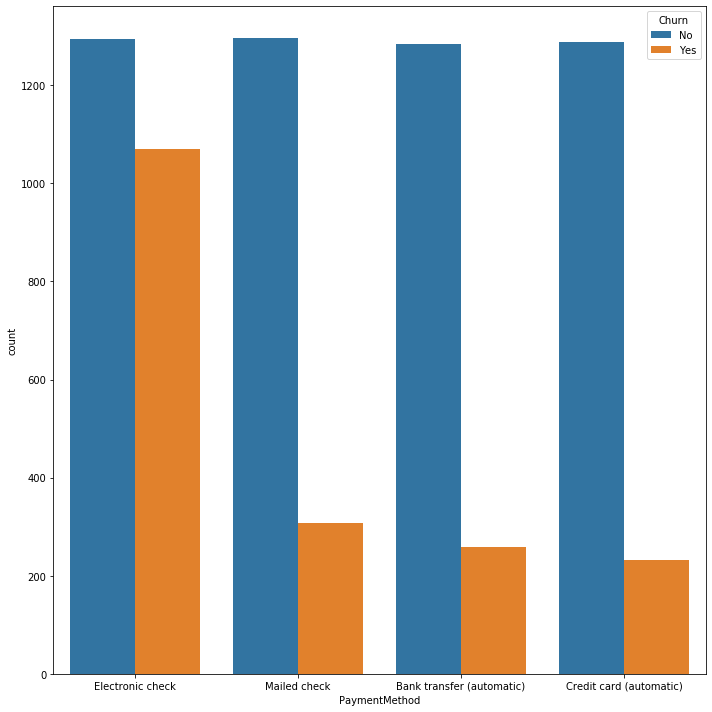

In [25]:
fig = plt.figure(figsize=(10,10))
sns.countplot('PaymentMethod', hue='Churn', data=Customer)
plt.tight_layout()
plt.show()

In [26]:
from sklearn.preprocessing import LabelEncoder
Customer = Customer.apply(LabelEncoder().fit_transform)
Customer = Customer.drop('customerID',axis=1)

In [27]:
Customer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,142,2504,0
1,1,0,0,0,33,1,0,0,2,0,2,0,0,0,1,0,3,497,1465,0
2,1,0,0,0,1,1,0,0,2,2,0,0,0,0,0,1,3,435,156,1
3,1,0,0,0,44,0,1,0,2,0,2,2,0,0,1,0,0,266,1399,0
4,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,728,924,1


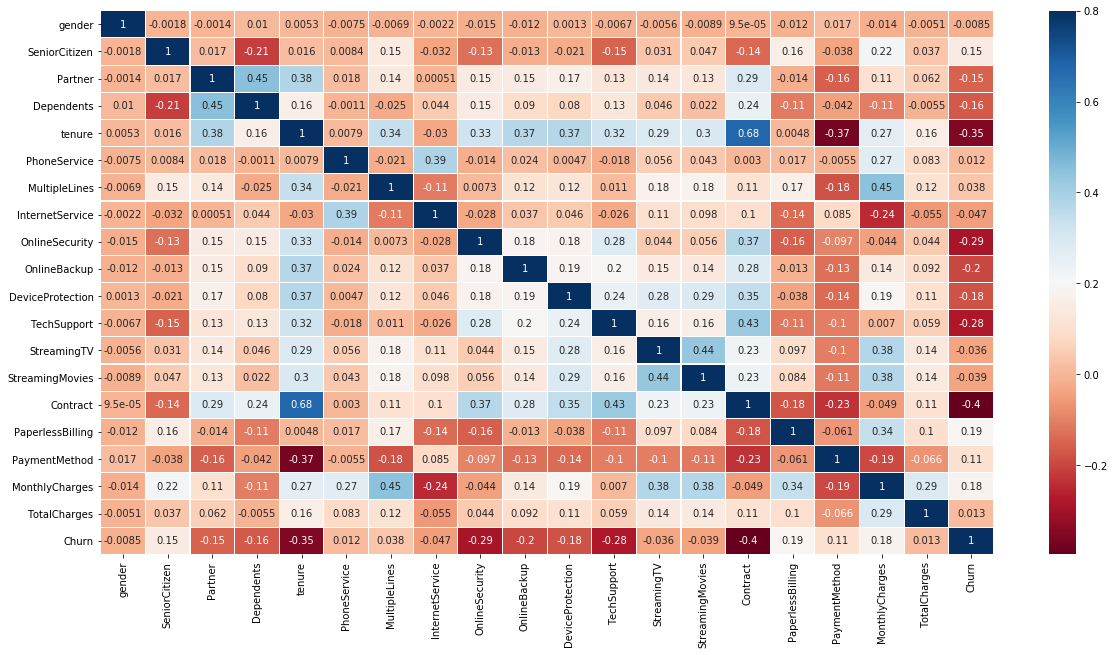

In [28]:
# Correlation Plot
corrmat = Customer.corr()

#Set uo the matplolib figure
f, ax = plt.subplots(figsize=(20, 10))

#Draw the heatmap using seaborn
colormap = plt.cm.RdBu
sns.heatmap(corrmat, linewidths=0.1, cmap = colormap, linecolor = 'White', vmax=0.8, annot=True)


In [29]:
#Splitting the data into features & target

X = Customer.iloc[:,:-2]
y = Customer[["Churn"]]

In [30]:
#Prediction - Classification Algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [31]:
#Split the data into train and test set for classifcation predictions

from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=9,stratify=y)
x_train.shape, y_train.shape, x_test.shape

((4922, 18), (4922, 1), (2110, 18))

In [32]:
KNN=KNeighborsClassifier(n_neighbors=6)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=1000,random_state=0)

In [33]:
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('GaussianNB',GNB))
models.append(('RandomForestClassifier',RFC))

In [34]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

############################### KNeighborsClassifier ##################################

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy_score=  0.7654028436018957


Cross_val_score= 0.7773044956077164


roc_auc_score=  0.6429580811724889


classification_report
               precision    recall  f1-score   support

           0       0.80      0.90      0.85      1549
           1       0.59      0.38      0.46       561

    accuracy                           0.77      2110
   macro avg       0.70      0.64      0.66      2110
weighted avg       0.75      0.77      0.75      2110
 

Confusion Matrix
 [[1401  148]
 [ 347  214]] 




############################### SVC ##################################

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', 

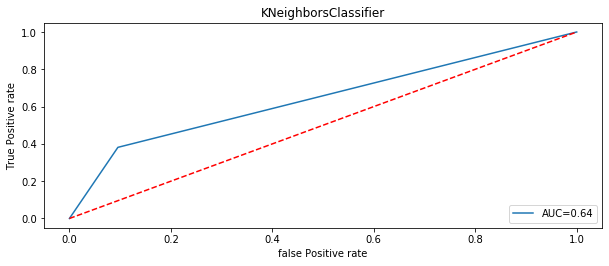

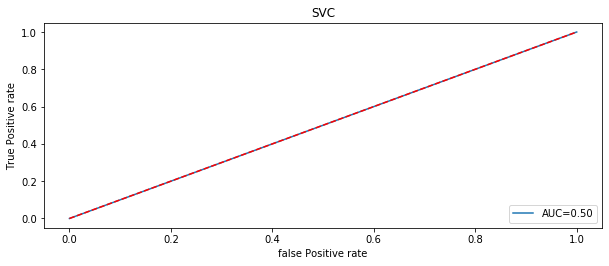

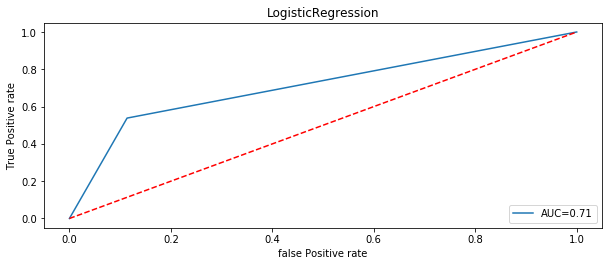

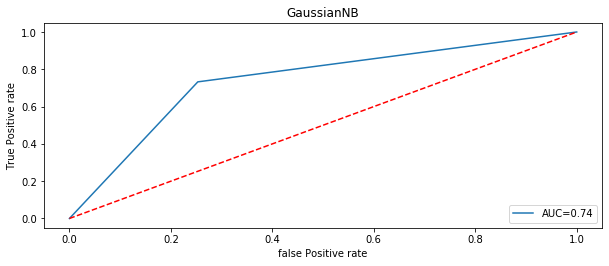

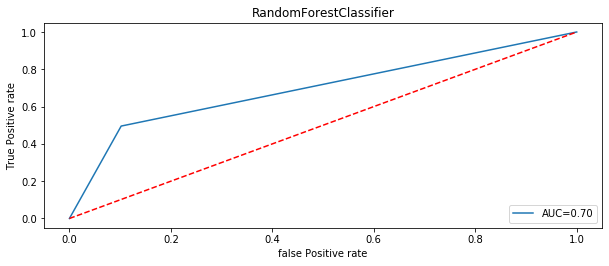

In [35]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('###############################',name,'##################################\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score= ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,X,y,cv=5,scoring='accuracy').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score= ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre),'\n')
    cm=confusion_matrix(y_test,pre)
    print('Confusion Matrix\n',cm,'\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive rate')
    plt.xlabel('false Positive rate')
    print('\n\n')

In [36]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,76.540284,77.730450,64.295808
1,SVC,73.412322,73.421503,50.000000
2,LogisticRegression,79.383886,80.275699,71.235136
3,GaussianNB,74.312796,75.639785,73.977691
4,RandomForestClassifier,79.099526,78.668828,69.677119


In [39]:
from sklearn.externals import joblib
joblib.dump(LR,'Model_Churn.pkl')

['Model_Churn.pkl']

In [40]:
model=joblib.load('Model_Churn.pkl')

In [41]:
result=pd.DataFrame(model.predict(x_test))